In [1]:
import tensorflow as tf

In [5]:
from tensorflow.keras.layers import Dense,Input,SimpleRNN,GRU,LSTM,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam,SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
series=np.sin((0.1 * np.arange(400))**2)

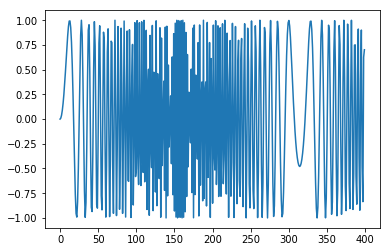

In [9]:
plt.plot(series)
plt.show()

In [12]:
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T,1) # make it N x T
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10, 1) Y.shape (390,)


In [17]:
i=Input(shape=(T,D))
x=LSTM(10)(i)
x=Dense(1)(x)
model=Model(i,x)
model.compile(optimizer=Adam(lr=0.1),loss='mse',)
r=model.fit(X[:-N//2],Y[:-N//2],batch_size=32,epochs=200,validation_data=(X[-N//2:], Y[-N//2:]),)

Train on 195 samples, validate on 195 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/200
195/195 [==============================] - 2s 9ms/sample - loss: 0.5594 - val_loss: 0.5427
Epoch 2/200
195/195 [==============================] - 0s 334us/sample - loss: 0.4832 - val_loss: 0.5862
Epoch 3/200
195/195 [==============================] - 0s 401us/sample - loss: 0.4492 - val_loss: 0.4798
Epoch 4/200
195/195 [==============================] - 0s 405us/sample - loss: 0.3117 - val_loss: 0.5365
Epoch 5/200
195/195 [==============================] - 0s 685us/sample - loss: 0.3209 - val_loss: 0.2715
Epoch 6/200
195/195 [==============================] - 0s 422us/sample - loss: 0.1875 - val_loss: 0.2617
Epoch 7/200
195/195 [==============================] - 0s 468us/sample - loss: 0.1454 - val_loss: 0.2426
Epoch 8/200
195/195 [==============================] - 0s 954us/sample - loss: 0.1180 - val_loss: 0.2126
Epoch 9/200
195/195 [=

195/195 [==============================] - 0s 441us/sample - loss: 0.0014 - val_loss: 0.1354
Epoch 75/200
195/195 [==============================] - 0s 441us/sample - loss: 0.0015 - val_loss: 0.1354
Epoch 76/200
195/195 [==============================] - 0s 389us/sample - loss: 0.0013 - val_loss: 0.1330
Epoch 77/200
195/195 [==============================] - 0s 631us/sample - loss: 0.0013 - val_loss: 0.1312
Epoch 78/200
195/195 [==============================] - 0s 547us/sample - loss: 0.0016 - val_loss: 0.1379
Epoch 79/200
195/195 [==============================] - 0s 602us/sample - loss: 0.0013 - val_loss: 0.1443
Epoch 80/200
195/195 [==============================] - 0s 469us/sample - loss: 0.0021 - val_loss: 0.1410
Epoch 81/200
195/195 [==============================] - 0s 432us/sample - loss: 0.0032 - val_loss: 0.1285
Epoch 82/200
195/195 [==============================] - 0s 367us/sample - loss: 0.0029 - val_loss: 0.1344
Epoch 83/200
195/195 [==============================] - 0s 

Epoch 151/200
195/195 [==============================] - 0s 444us/sample - loss: 0.3614 - val_loss: 0.4451
Epoch 152/200
195/195 [==============================] - 0s 449us/sample - loss: 0.3585 - val_loss: 0.4298
Epoch 153/200
195/195 [==============================] - 0s 428us/sample - loss: 0.3275 - val_loss: 0.5536
Epoch 154/200
195/195 [==============================] - 0s 385us/sample - loss: 0.3346 - val_loss: 0.4713
Epoch 155/200
195/195 [==============================] - 0s 495us/sample - loss: 0.3489 - val_loss: 0.4056
Epoch 156/200
195/195 [==============================] - 0s 541us/sample - loss: 0.3316 - val_loss: 0.4190
Epoch 157/200
195/195 [==============================] - 0s 472us/sample - loss: 0.3424 - val_loss: 0.5231
Epoch 158/200
195/195 [==============================] - 0s 435us/sample - loss: 0.3397 - val_loss: 0.4983
Epoch 159/200
195/195 [==============================] - 0s 434us/sample - loss: 0.3226 - val_loss: 0.4474
Epoch 160/200
195/195 [==============

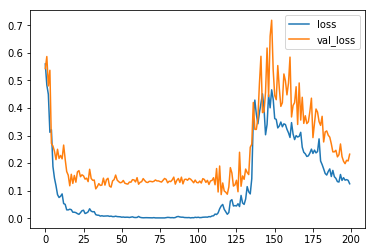

In [18]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

(390, 1)


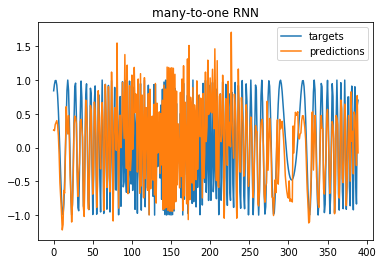

In [20]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()


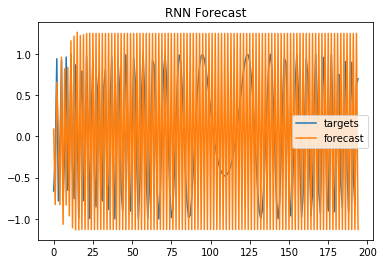

In [21]:
# Multi-step forecast
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  # Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()